#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [15]:
dataset.shape

(690, 16)

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [4]:
# Import the MiniSom library for Self-Organizing Maps (SOM) and initialize a SOM object.
# Set the grid size as 10x10 (x=10, y=10) and the input vector length to 15.
# Initialize the SOM with random weights and specify a neighborhood radius (sigma) of 1.0 
# and a learning rate of 0.5.
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


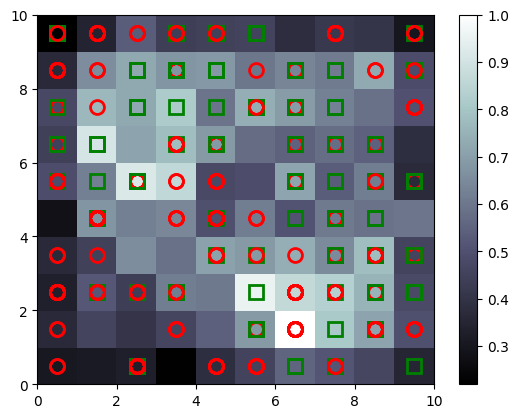

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
# Create a blank canvas for visualization using the 'bone()' function.
bone()
# Plot the distance map of the Self-Organizing Map (SOM) and apply colors using 'pcolor'.
pcolor(som.distance_map().T)
# Add a colorbar to the plot for reference.
colorbar()

# Define markers and colors for data points.
markers = ['o', 's']
colors = ['r', 'g']
# Iterate through the data points in 'X' and plot them on the SOM grid.
for i, x in enumerate(X):
    # Find the winning neuron (the neuron with the closest weight vector to the input 'x').
    w = som.winner(x)
    # Plot a marker on the SOM grid for the current data point.
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],  # Use 'o' or 's' marker based on the class label 'y'.
         markeredgecolor=colors[y[i]],  # Set marker edge color based on class label.
         markerfacecolor='None',  # No marker face color (hollow marker).
         markersize=10,
         markeredgewidth=2)
    
# Display the SOM visualization with data points.
show()

## Finding the frauds


In [7]:
# Map the input data 'X' to the winning neurons on the Self-Organizing Map (SOM).
# 'mappings' will contain a dictionary where the keys are neuron coordinates and
# the values are lists of data points assigned to each neuron.
mappings = som.win_map(X)

# Retrieve the data points that are mapped to a specific neuron.
frauds = mappings[(6, 1)]

# Inverse transform the mapped data points using 'sc', which is likely a scaler or pre-processing object.
frauds = sc.inverse_transform(frauds)


In [8]:
res=[]

##Printing the Fraunch Clients

In [9]:
# Print the IDs of fraud customers that have been extracted from the SOM mapping.
print('Fraud Customer IDs')

# Iterate through the rows of 'frauds' array, where the first column contains customer IDs.
# Print each customer ID as an integer and store it in the 'res' list (assuming 'res' is defined elsewhere).
for i in frauds[:, 0]:
    print(int(i))
    res.append(int(i))


Fraud Customer IDs
15662854
15745375
15638983
15623210
15734578
15795527
15641733
15660144
15802869
15800554
15617991
15696120
15750545
15687634


In [11]:
# Filter the 'dataset' DataFrame to select rows where the 'CustomerID' column matches
# the customer IDs stored in the 'res' list, creating a new DataFrame 'matched_rows'.
matched_rows = dataset[dataset['CustomerID'].isin(res)]

In [12]:
matched_rows

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
161,15745375,0,33.08,1.625,2,2,4,0.540,0,0,0,1,2,0,1,0
176,15638983,0,56.83,4.250,1,1,1,5.000,0,0,0,1,2,0,5,0
214,15623210,0,26.58,2.540,1,1,1,0.000,0,0,0,1,2,180,61,0
262,15734578,0,21.75,11.750,2,8,4,0.250,0,0,0,1,2,180,1,0
334,15795527,0,42.25,1.750,1,8,4,0.000,0,0,0,1,2,150,2,0
365,15641733,0,50.25,0.835,2,6,4,0.500,0,0,0,1,2,240,118,0
386,15660144,0,26.17,2.000,2,5,3,0.000,0,0,0,1,2,276,2,0
415,15802869,0,30.25,5.500,2,4,4,5.500,0,0,0,1,1,100,1,0
527,15800554,0,45.33,1.000,2,11,4,0.125,0,0,0,1,2,263,1,0
